In [1]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import pickle
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Import dataset
df=pd.read_csv("cardio_data_processed.csv")

# Data Wrangling  and Visualization

In [3]:
#Data visualization first lines
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [4]:
#Number of rows and columns in the dataset
df.shape

(68205, 17)

In [5]:
##Checking variable types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [6]:
#Removing the column with encode, to do it manually later
df=df.drop(columns=['bp_category_encoded'],axis=1)

In [7]:
#Removing the age column, because there is a variable that gives the same information
df=df.drop(columns=['age'],axis=1)

In [8]:
#General descriptive statistics of the dataset variables
df.describe()

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [9]:
#Checking for missing values
df.isnull().sum()

id             0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
bmi            0
bp_category    0
dtype: int64

In [10]:
#Checking for duplicate values
df[df.duplicated(keep = False)]

,id,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category


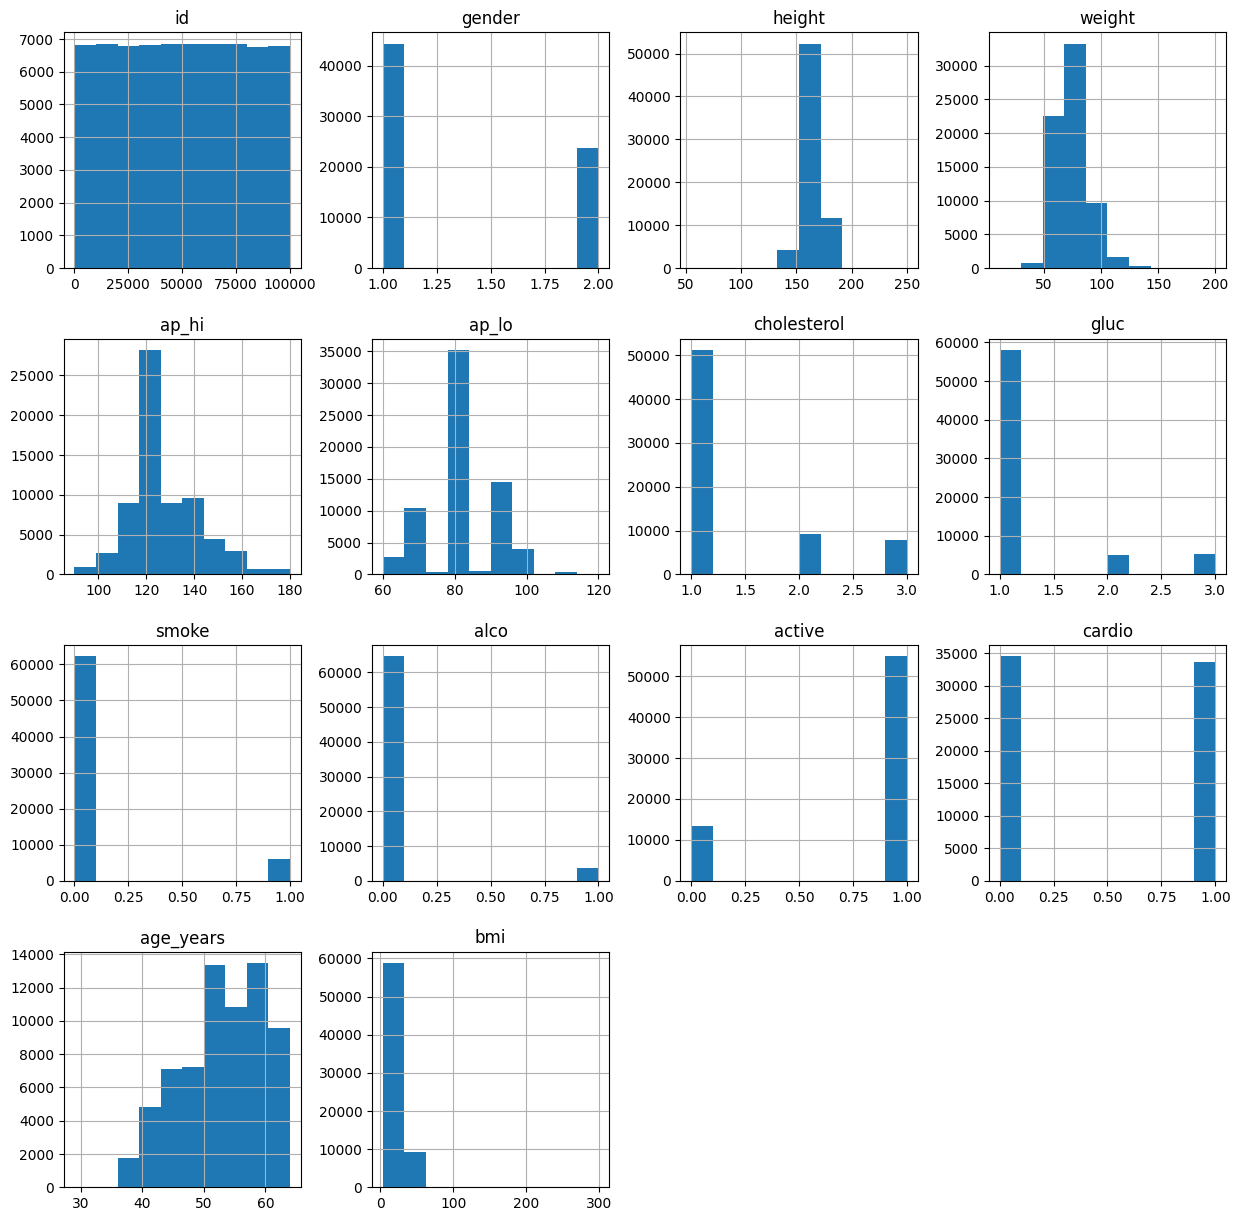

In [11]:
#Overview of data
df.hist(figsize = (15,15), bins = 10) 
plt.show()

#The variables “height”, “weight”, “age years” seem to have outliers

<Axes: >

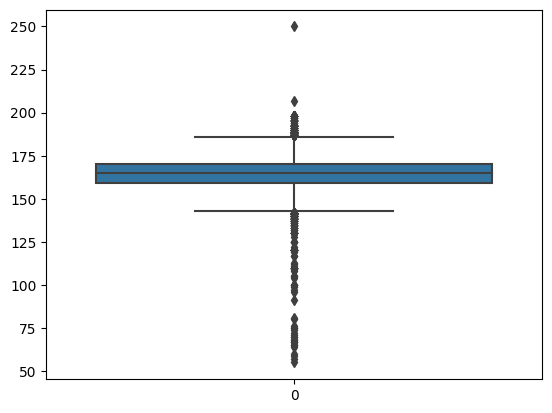

In [12]:
# Boxplot
sns.boxplot(df.height)

In [13]:
# Frequency by higher values
df.height.sort_values(ascending = False).head()

6319     250
21064    207
39058    198
61533    198
1089     198
Name: height, dtype: int64

In [14]:
# Frequency by lower values
df.height.sort_values(ascending = True).head(30)

22136     55
64939     57
62470     59
28400     60
26893     64
32738     65
43349     65
49482     67
13965     67
51984     67
21961     68
45123     68
14791     70
50138     70
12941     71
31275     72
16282     74
12451     75
46133     75
222       76
26681     80
23300     81
27990     91
54590     96
7962      97
63620     99
57365    100
3337     100
16650    100
58101    104
Name: height, dtype: int64

In [15]:
#Checking the number of participants before and after the procedure
df.shape

(68205, 15)

In [16]:
#Removing a 2.50m tall person, to make the analysis more generalizable.
#The smallest sizes also present outliers, especially since the minimum age is 29 years old.
#On the other hand, despite presenting several low values, it may be a possible characteristic of people with Achondroplasia.
df = df[df.height < 250]
df.shape

(68204, 15)

<Axes: >

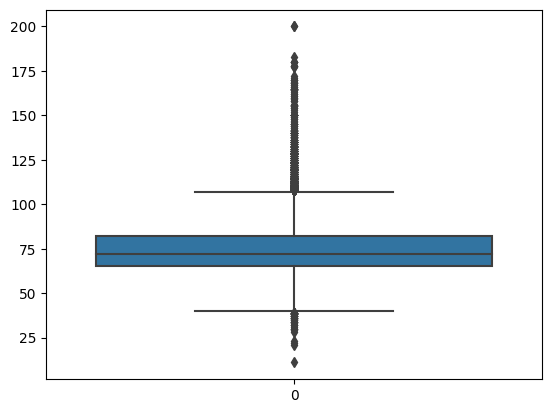

In [17]:
# Boxplot
sns.boxplot(df.weight)

In [18]:
# Frequency by higher values
df.weight.sort_values(ascending = False).head()

426      200.0
49114    200.0
59711    183.0
59032    180.0
44210    180.0
Name: weight, dtype: float64

In [19]:
# Frequency by lower values
df.weight.sort_values(ascending = True).head(30)

32945    11.00
58644    21.00
28724    22.00
26119    23.00
33391    28.00
59138    29.00
18086    30.00
40835    30.00
3661     30.00
16487    31.00
21444    32.00
34401    32.00
37432    32.00
46846    33.00
14357    34.00
32644    34.00
50504    34.00
54425    34.00
15913    35.00
56708    35.00
24554    35.45
33397    36.00
51865    36.00
47372    36.00
31264    36.00
32948    36.00
52646    37.00
28571    37.00
5642     37.00
50091    37.00
Name: weight, dtype: float64

In [20]:
#Checking the number of participants before and after the procedure
df.shape

(68204, 15)

In [21]:
#The highest weights do not appear to be values that need to be removed, but rather an above-average standard for some participants.
#The lowest weights present values well below the standard for adults, even with Achondroplasia
#that according to data from Clarity, the minimum value for this population is 35kg.
#In order to make the model more generalizable, values below 35 were removed.
df = df[df.weight >= 35]
df.shape

(68186, 15)

<Axes: >

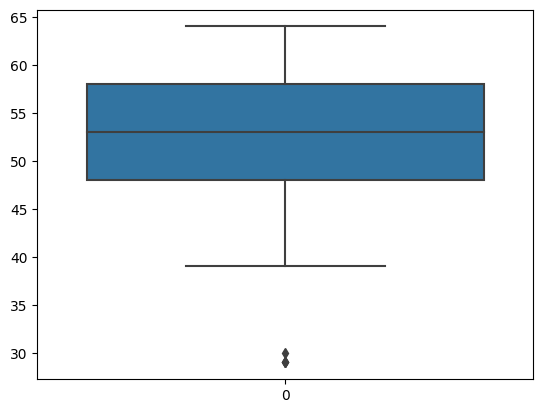

In [22]:
# Boxplot
sns.boxplot(df.age_years)

In [23]:
# Frequency by lower values
df.age_years.sort_values(ascending = True).head()
#Age does not indicate extreme value, but rather some participants with real data outside the standard expected by the sample mean

21765    29
6057     29
29871    29
54477    30
24192    39
Name: age_years, dtype: int64

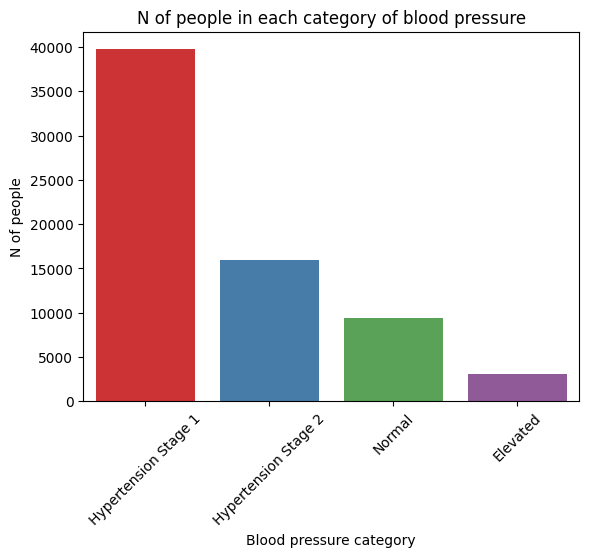

In [24]:
#Barplot of the number of participants in each of the blood pressure categories
sns.countplot(data=df, x='bp_category', palette="Set1")
plt.xlabel("Blood pressure category")
plt.ylabel("N of people")
plt.title("N of people in each category of blood pressure")
plt.xticks(rotation=45)
plt.show()

In [25]:
#Value counts
df['bp_category'].value_counts()

Hypertension Stage 1    39743
Hypertension Stage 2    15934
Normal                   9409
Elevated                 3100
Name: bp_category, dtype: int64

Text(0.5, 0, 'Cholesterol Levels (1: Normal, 2: Above Normal, 3: Well Above Normal)')

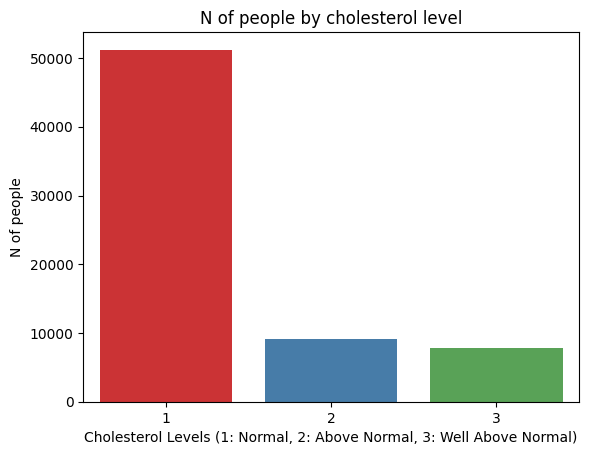

In [26]:
#Barplot  of the number of participants by cholesterol level
sns.countplot(data=df, x='cholesterol', palette="Set1")
plt.title("N of people by cholesterol level")
plt.ylabel("N of people")
plt.xlabel('Cholesterol Levels (1: Normal, 2: Above Normal, 3: Well Above Normal)')

In [27]:
#Value counts
df['cholesterol'].value_counts()

1    51209
2     9187
3     7790
Name: cholesterol, dtype: int64

Text(0.5, 0, 'Glucose levels (1: Normal, 2: Above Normal, 3: Well Above Normal)')

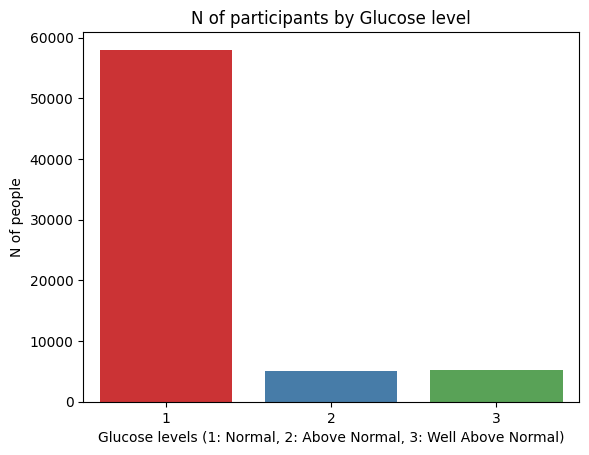

In [28]:
#Barplot  of the number of participants by Glucose level
sns.countplot(data=df, x='gluc', palette="Set1")
plt.title("N of participants by Glucose level")
plt.ylabel("N of people")
plt.xlabel('Glucose levels (1: Normal, 2: Above Normal, 3: Well Above Normal)')

In [29]:
#Value counts
df['gluc'].value_counts()

1    58011
3     5179
2     4996
Name: gluc, dtype: int64

Text(0.5, 0, 'Smoker (0: No, 1: Yes)')

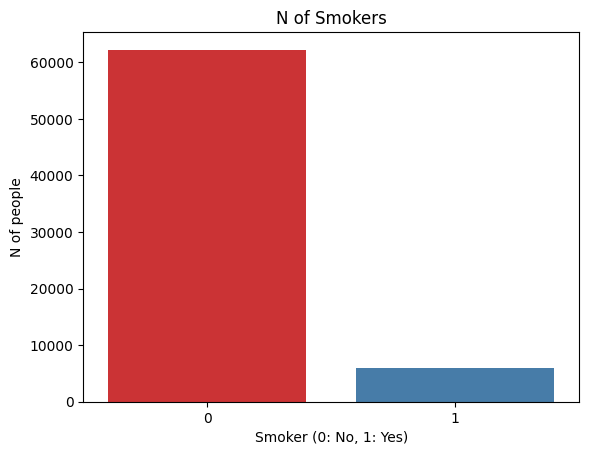

In [30]:
#Barplot  of the number of smokers
sns.countplot(data=df, x='smoke', palette="Set1")
plt.title("N of Smokers")
plt.ylabel("N of people")
plt.xlabel('Smoker (0: No, 1: Yes)')

In [31]:
#Value counts
df['smoke'].value_counts()

0    62208
1     5978
Name: smoke, dtype: int64

Text(0.5, 0, 'Consumes alcohol (0: No, 1: Yes)')

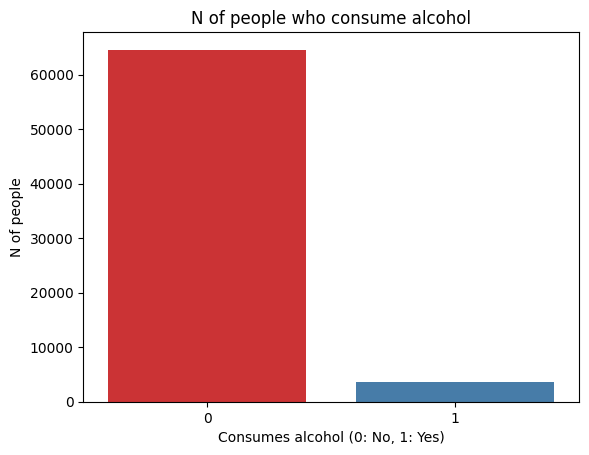

In [32]:
#Barplot  of the number of people who consume alcohol
sns.countplot(data=df, x='alco', palette="Set1")
plt.title("N of people who consume alcohol")
plt.ylabel("N of people")
plt.xlabel('Consumes alcohol (0: No, 1: Yes)')

In [33]:
#Value counts
df['alco'].value_counts()

0    64563
1     3623
Name: alco, dtype: int64

Text(0.5, 0, 'Physically active (0: No, 1: Yes)')

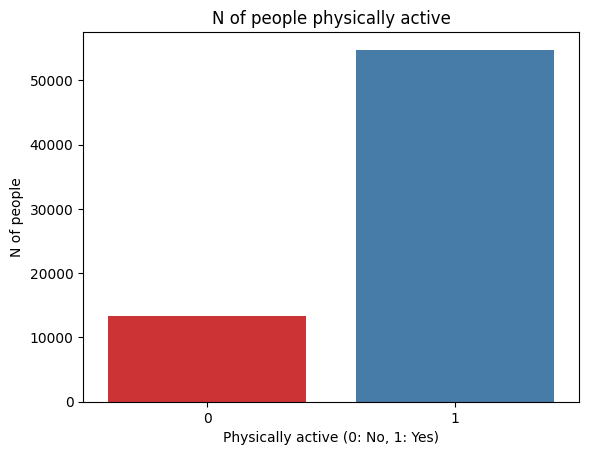

In [34]:
#Barplot  of the Physical activity
sns.countplot(data=df, x='active', palette="Set1")
plt.title("N of people physically active")
plt.ylabel("N of people")
plt.xlabel('Physically active (0: No, 1: Yes)')

In [35]:
#Value counts
df['active'].value_counts()

1    54789
0    13397
Name: active, dtype: int64

Text(0.5, 0, 'Presence of cardiovascular disease (0: No, 1: Yes)')

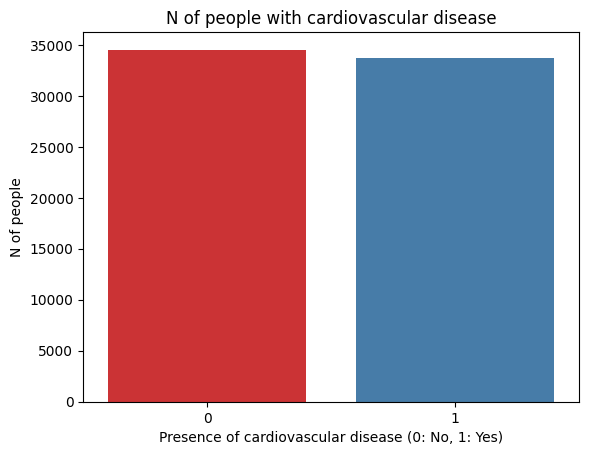

In [36]:
#Barplot of the number of people with cardiovascular disease - Target variable
sns.countplot(data=df, x='cardio', palette="Set1")
plt.title("N of people with cardiovascular disease")
plt.ylabel("N of people")
plt.xlabel('Presence of cardiovascular disease (0: No, 1: Yes)')

In [37]:
#Value counts
df['cardio'].value_counts()

0    34522
1    33664
Name: cardio, dtype: int64

# Data analysis and Machine Learning

In [38]:
#Relization of ordinal enconder, transforming qualitative values into quantitative ordinals
OE = OrdinalEncoder(categories=[['Normal','Elevated','Hypertension Stage 1','Hypertension Stage 2']])
OE.fit(df[['bp_category']])

OrdinalEncoder(categories=[['Normal', 'Elevated', 'Hypertension Stage 1',
                            'Hypertension Stage 2']])

In [39]:
#Creating a variable with the transformed variable
df['bp_encoded'] = OE.transform(df[['bp_category']])

In [40]:
#Removing the qualitative variable and id
df = df.drop(columns='bp_category',axis=1)
df = df.drop(columns='id',axis=1)

In [41]:
#Data visualization first lines
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_encoded
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,2.0
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,3.0
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,2.0
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,3.0
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,0.0


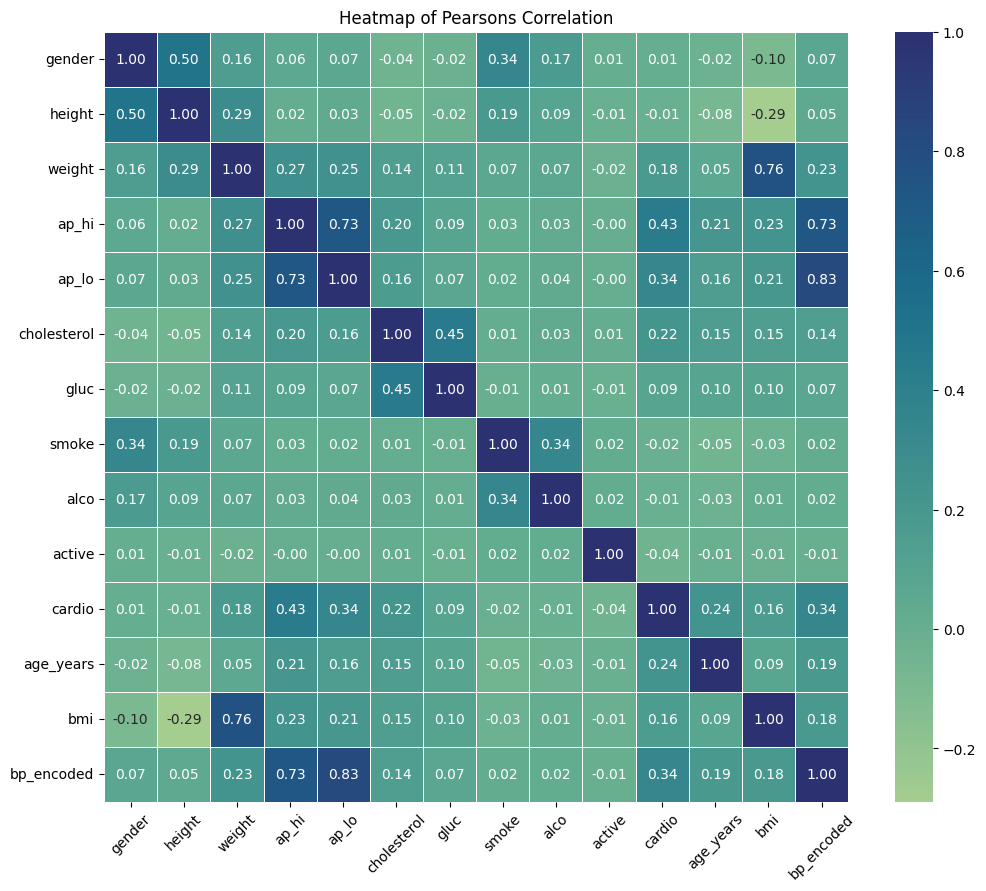

In [42]:
#Creating a Pearson correlation matrix with the variables, to check how the variables are associated
corr_matrix = df.corr()
plt.figure(figsize = (12, 10))
sns.heatmap(corr_matrix, annot = True, cmap = "crest", fmt = ".2f", linewidths = .5)
plt.title("Heatmap of Pearsons Correlation")
plt.xticks(rotation=45)
plt.show()

## Comments
- Cardiovascular disease has a moderate positive correlation with high (0.43) and low (0.34) dystolic blood pressure and blood pressure category (0.34);
- The blood pressure category presents a strong positive correlation with high (0.73) and low (0.84) dystolic blood pressure, which indicates possible multicollinearity;
- BMI has a strong positive correlation with weight (0.76) and a weak negative correlation with height (-0.29), which indicates possible multicollinearity;
- There is a moderate correlation between alcohol users and smokers (0.34).

In [43]:
#Removing variables with possible multicollinearity
df = df.drop('bmi',axis=1)
df = df.drop('bp_encoded',axis=1)

In [44]:
#Separating the target variable from other variables
x = df.drop('cardio',axis=1)
y = df['cardio']

In [45]:
#Separating train and test data
x_train,x_test,y_train,y_test=train_test_split(x,
                                               y,
                                               test_size=0.25,
                                               random_state=123,
                                               stratify = df.cardio)

In [46]:
#Verifying the shape
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(51139, 11) (17047, 11) (51139,) (17047,)


In [47]:
#Checking if classes are balanced
y_train.value_counts()

0    25891
1    25248
Name: cardio, dtype: int64

In [48]:
#Data visualization first lines
x_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years
9724,1,157,66.0,100,70,1,1,0,0,1,46
40825,1,160,63.0,140,90,1,1,0,0,0,52
67579,1,169,98.0,160,110,2,2,0,0,1,60
54854,1,165,55.2,110,70,1,1,0,0,0,47
1219,2,176,72.0,120,80,1,1,0,0,1,47


# Standardization

In [49]:
#Standardization of data for z-score
train_mean = x_train.mean()
train_std = x_train.std()
x_train = (x_train - train_mean) / train_std

In [50]:
#Data visualization first lines
x_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years
9724,-0.731660,-0.903116,-0.569905,-1.661214,-1.236323,-0.536047,-0.395130,-0.31024,-0.237519,0.497464,-1.002506
40825,-0.731660,-0.536166,-0.780320,0.853208,0.957348,-0.536047,-0.395130,-0.31024,-0.237519,-2.010157,-0.118404
67579,-0.731660,0.564684,1.674529,2.110418,3.151018,0.940226,1.353748,-0.31024,-0.237519,0.497464,1.060398
54854,-0.731660,0.075417,-1.327401,-1.032608,-1.236323,-0.536047,-0.395130,-0.31024,-0.237519,-2.010157,-0.855155
1219,1.366728,1.420900,-0.149073,-0.404003,-0.139488,-0.536047,-0.395130,-0.31024,-0.237519,0.497464,-0.855155


In [51]:
#Standardization of test dataset
x_test = (x_test - train_mean) / train_std

In [52]:
#Data visualization first lines
x_test.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years
58536,-0.731660,0.442367,1.393975,-1.032608,-1.236323,-0.536047,-0.39513,-0.31024,-0.237519,0.497464,-0.118404
39258,-0.731660,-0.536166,-0.289350,2.110418,2.054183,-0.536047,-0.39513,-0.31024,-0.237519,0.497464,0.470997
64521,-0.731660,0.075417,-0.569905,-0.404003,-0.139488,-0.536047,-0.39513,-0.31024,-0.237519,0.497464,-1.149856
6205,1.366728,-0.536166,-0.990736,-0.404003,-0.139488,-0.536047,-0.39513,-0.31024,-0.237519,-2.010157,0.323647
22894,-0.731660,-1.025432,-0.990736,-0.404003,-0.139488,-0.536047,-0.39513,-0.31024,-0.237519,0.497464,-0.560455


# Logistic Regression

In [53]:
#Hyperparameter specification
tuned_params_v1 = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
                   'penalty': ['l1', 'l2']}

In [54]:
#Creating model
model_v1 = GridSearchCV(LogisticRegression(), 
                         tuned_params_v1, 
                         scoring = 'roc_auc', 
                         n_jobs = -1)

In [55]:
model_v1.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [56]:
#Verifying the best estimator
model_v1.best_estimator_

LogisticRegression(C=100)

In [57]:
y_pred_v1 = model_v1.predict(x_test)

In [58]:
y_pred_v1[:10]

array([0, 1, 0, 0, 0, 1, 0, 0, 1, 1], dtype=int64)

In [59]:
y_pred_proba_v1 = model_v1.predict_proba(x_test)

In [60]:
y_pred_proba_v1[:10]

array([[0.7414066 , 0.2585934 ],
       [0.1065584 , 0.8934416 ],
       [0.73556528, 0.26443472],
       [0.58618334, 0.41381666],
       [0.7001282 , 0.2998718 ],
       [0.12952604, 0.87047396],
       [0.6399817 , 0.3600183 ],
       [0.52518734, 0.47481266],
       [0.29069838, 0.70930162],
       [0.08025935, 0.91974065]])

In [61]:
y_pred_proba_v1 = model_v1.predict_proba(x_test)[:,1]

In [62]:
y_pred_proba_v1[:10]

array([0.2585934 , 0.8934416 , 0.26443472, 0.41381666, 0.2998718 ,
       0.87047396, 0.3600183 , 0.47481266, 0.70930162, 0.91974065])

In [63]:
#Verifying the probabilities of data points
i = 15 
print('For data point {}, real class = {}, predicted class = {}, predicted probability = {}'.
      format(i, y_test.iloc[i], y_pred_v1[i], y_pred_proba_v1[i]))

For data point 15, real class = 1, predicted class = 1, predicted probability = 0.8148973362914979


In [64]:
#Creating main scores
roc_auc_v1 = roc_auc_score(y_test, y_pred_v1)
fpr_v1, tpr_v1, thresholds = roc_curve(y_test, y_pred_proba_v1)
auc_v1 = auc(fpr_v1, tpr_v1)
accuracy_v1 = accuracy_score(y_test, y_pred_v1)

In [65]:
#Classification report
print(classification_report(y_test, y_pred_v1))

              precision    recall  f1-score   support

           0       0.71      0.78      0.75      8631
           1       0.75      0.67      0.71      8416

    accuracy                           0.73     17047
   macro avg       0.73      0.73      0.73     17047
weighted avg       0.73      0.73      0.73     17047



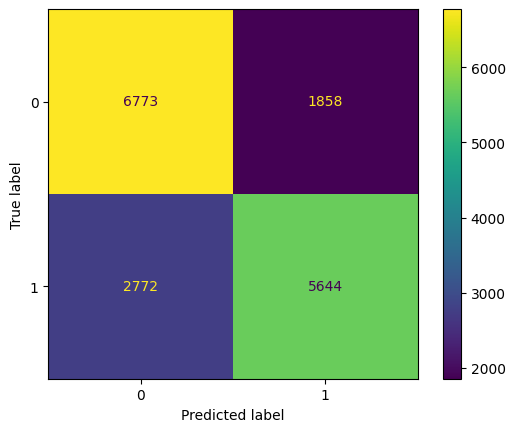

In [66]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_v1)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot() 
plt.show()

In [67]:
#Creating model with best hyperparameters
model_v1 = LogisticRegression(C = 100)
model_v1.fit(x_train, y_train)

LogisticRegression(C=100)

In [68]:
indices = np.argsort(-abs(model_v1.coef_[0,:]))

In [69]:
#List of Most important variables
print("Most important variables for the result of model_v1:")
print(50*'-')
for feature in x.columns[indices]:
    print(feature)

Most important variables for the result of model_v1:
--------------------------------------------------
ap_hi
age_years
cholesterol
weight
ap_lo
active
gluc
alco
height
smoke
gender


In [70]:
#Saving model
with open('models/model_v1.pkl', 'wb') as pickle_file:
      joblib.dump(model_v1, 'models/model_v1.pkl') 

In [71]:
#Creating a dataframe to display the models
df_models = pd.DataFrame()

In [72]:
#Dictionary of model_v1 metrics
dict_model_v1 = {'Name': 'model_v1', 
                  'Algorithm': 'Logist Regression', 
                  'ROC_AUC Score': roc_auc_v1,
                  'AUC Score': auc_v1,
                  'Accuracy': accuracy_v1}

In [73]:
#Add the created dictionary to dataframe
df_models = df_models.append(dict_model_v1, ignore_index = True)

In [74]:
display(df_models)

,Name,Algorithm,ROC_AUC Score,AUC Score,Accuracy
0,model_v1,Logist Regression,0.727678,0.794516,0.728398


# Random Forest

In [75]:
#Hyperparameter Grid
tuned_params_v2 = {'n_estimators': [100, 200, 300, 400, 500], 
                   'min_samples_split': [2, 5, 10], 
                   'min_samples_leaf': [1, 2, 4]}

In [76]:
#Creates the model with RandomizedSearchCV to search for the best combination of hyperparameters
model_v2 = RandomizedSearchCV(RandomForestClassifier(), 
                               tuned_params_v2, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs  = -1)

In [ ]:
#Train model
model_v2.fit(x_train, y_train)

In [ ]:
#Verifying the best estimator
model_v2.best_estimator_

In [ ]:
#Predicts of test
y_pred_v2 = model_v2.predict(x_test)

In [ ]:
#Predictions of positive class
y_pred_proba_v2 = model_v2.predict_proba(x_test)[:,1]

In [ ]:
#Classification Report
print(classification_report(y_test, y_pred_v2))

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred_v2)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot() 
plt.show()

In [ ]:
#Creating main scores
roc_auc_v2 = roc_auc_score(y_test, y_pred_v2)
fpr_v2, tpr_v2, thresholds = roc_curve(y_test, y_pred_proba_v2)
auc_v2 = auc(fpr_v2, tpr_v2)
accuracy_v2 = accuracy_score(y_test, y_pred_v2)

In [ ]:
#Creating model with best hyperparameters
model_v2 = RandomForestClassifier(n_estimators = 300, min_samples_split = 10, min_samples_leaf = 4)
model_v2.fit(x_train, y_train)

In [ ]:
#List of Most important variables
indices = np.argsort(-model_v2.feature_importances_)
print("Most important variables of the model_v2:")
print(50*'-')
for feature in x.columns[indices]:
    print(feature)

In [ ]:
#Saving model
with open('models/model_v2.pkl', 'wb') as pickle_file:
      joblib.dump(model_v2, 'models/model_v2.pkl') 

In [ ]:
#Dictionary of model_v2 metrics
dict_model_v2 = {'Name': 'model_v2', 
                  'Algorithm': 'Random Forest', 
                  'ROC_AUC Score': roc_auc_v2,
                  'AUC Score': auc_v2,
                  'Accuracy': accuracy_v2}

In [ ]:
#Add the created dictionary to dataframe
df_models = df_models.append(dict_model_v2, ignore_index = True)

In [ ]:
display(df_models)

# KMN

In [ ]:
#List of possible values of K
neighbors = list(range(1, 20, 2))

In [ ]:
#List of scores
cv_scores = []

In [ ]:
#Cross Validation to check the best value of k
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, x_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean()) 

In [ ]:
#Adjusting the error of classification
error = [1 - x for x in cv_scores]

In [ ]:
#Checking the best value of k (with lowest error)
optimal_k = neighbors[error.index(min(error))]
print('The ideal value of k is %d' % optimal_k)

In [ ]:
#Creating model
model_v3 = KNeighborsClassifier(n_neighbors = optimal_k)

In [ ]:
#Train model
model_v3.fit(x_train, y_train)

In [ ]:
#Predicts
y_pred_v3 = model_v3.predict(x_test)

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_v3)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot() 
plt.show()

In [ ]:
#Predictions of positive class
y_pred_proba_v3 = model_v3.predict_proba(x_test)[:,1]

In [ ]:
#Creating main scores
roc_auc_v3 = roc_auc_score(y_test, y_pred_v3)
fpr_v3, tpr_v3, thresholds = roc_curve(y_test, y_pred_proba_v3)
auc_v3 = auc(fpr_v3, tpr_v3)
accuracy_v3 = accuracy_score(y_test, y_pred_v3)

In [ ]:
#Saving model
with open('models/model_v3.pkl', 'wb') as pickle_file:
      joblib.dump(model_v3, 'models/model_v3.pkl') 

In [ ]:
# Dictionary of model_v3 metrics
dict_model_v3 = {'Name': 'model_v3', 
                  'Algorithm': 'KNN', 
                  'ROC_AUC Score': roc_auc_v3,
                  'AUC Score': auc_v3,
                  'Accuracy': accuracy_v3}

In [ ]:
#Add the created dictionary to dataframe
df_models = df_models.append(dict_model_v3, ignore_index = True)

In [ ]:
display(df_models)

# Decision Tree

In [ ]:
#Hyperparameter Grid
tuned_params_v4 = {'min_samples_split': [2, 3, 4, 5, 7], 
                   'min_samples_leaf': [1, 2, 3, 4, 6], 
                   'max_depth': [2, 3, 4, 5, 6, 7]}

In [ ]:
#Create a model with RandomizedSearchCV
model_v4 = RandomizedSearchCV(DecisionTreeClassifier(), 
                               tuned_params_v4, 
                               n_iter = 15, 
                               scoring = 'roc_auc', 
                               n_jobs = -1)

In [ ]:
#Train model
model_v4.fit(x_train, y_train)

In [ ]:
#Checking the best model
model_v4.best_estimator_

In [ ]:
#Predict
y_pred_v4 = model_v4.predict(x_test)

In [ ]:
#Predictions of positive class
y_pred_proba_v4 = model_v4.predict_proba(x_test)[:,1]

In [ ]:
#Confusion matrix
cm = confusion_matrix(y_test, y_pred_v4)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot() 
plt.show()

In [ ]:
#Creating main scores
roc_auc_v4 = roc_auc_score(y_test, y_pred_v4)
fpr_v4, tpr_v4, thresholds = roc_curve(y_test, y_pred_proba_v4)
auc_v4 = auc(fpr_v4, tpr_v4)
accuracy_v4 = accuracy_score(y_test, y_pred_v4)

print('the roc auc score was:', roc_auc_v4,
     ' the auc score was:', auc_v4,
     ' the accuracy was:', accuracy_v4)

In [ ]:
#Creating model with best hyperparameters
model_v4 = DecisionTreeClassifier(min_samples_split = 3, min_samples_leaf = 4, max_depth = 6)
model_v4.fit(x_train, y_train)

In [ ]:
#List of Most important variables
indices = np.argsort(-model_v4.feature_importances_)
print("Most important variables of model_v4:")
print(50*'-')
for feature in x.columns[indices]:
    print(feature)

In [ ]:
#Saving model
with open('models/model_v4.pkl', 'wb') as pickle_file:
      joblib.dump(model_v4, 'models/model_v4.pkl') 

In [ ]:
# Dictionary of model_v4 metrics
dict_model_v4 = {'Name': 'model_v4', 
                  'Algorithm': 'Decision Tree', 
                  'ROC_AUC Score': roc_auc_v4,
                  'AUC Score': auc_v4,
                  'Accuracy': accuracy_v4}

In [ ]:
#Add the created dictionary to dataframe
df_models = df_models.append(dict_model_v4, ignore_index = True)

In [ ]:
display(df_models)

# Selecting the best model

In [ ]:
#Selecting the best model using the metric AUC Score as a comparative parameter
df_best_model = df_models[df_models['AUC Score'] == df_models['AUC Score'].max()]

In [ ]:
df_best_model

# Conclusion and sugestions:
- Check/confirm with the data collection/medical team the possible presence of individuals with achondroplasia;
- If so, request support in identifying these participants, to create a database with these individuals, and possibly making the model more generalizable for each population;
- Of all the models, Random Forest seems to be the most suitable, as it presents the best metrics;
- The most important variables are: Systolic blood pressure, age, cholesterol, weight and Diastolic blood pressure;
- Adjusting hyperparameters can improve results.